 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = trainset.classes

print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
count_train_images = len(trainset)
count_test_images = len(testset)

print("Количество изображений trainset:", count_train_images)
print("Количество изображений testset:", count_test_images)


Количество изображений trainset: 60000
Количество изображений testset: 10000


In [ ]:
import torch
from collections import Counter

train_targ = trainset.targets
test_targ = testset.targets

train_class_counts = Counter(train_targ.numpy())
test_class_counts = Counter(test_targ.numpy())

print("Распределение классов train_targ:")
print(train_class_counts)

print("\nРаспределение классов test_targ:")
print(test_class_counts)

Распределение классов train_targ:
Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})

Распределение классов test_targ:
Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})


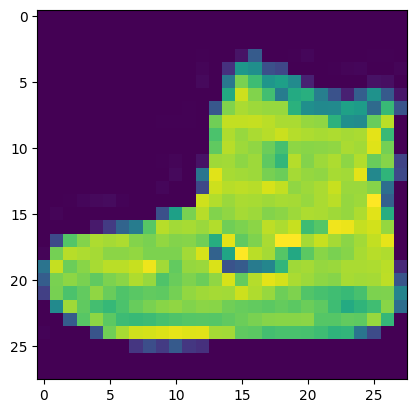

In [ ]:
plt.imshow(trainset.data[0])

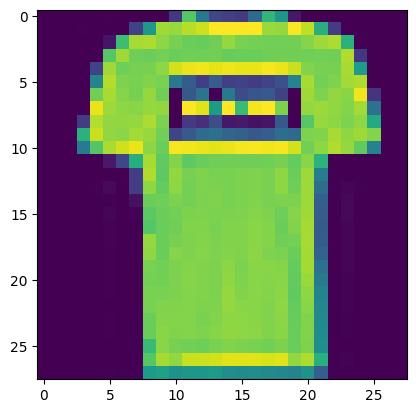

In [ ]:
plt.imshow(trainset.data[1])

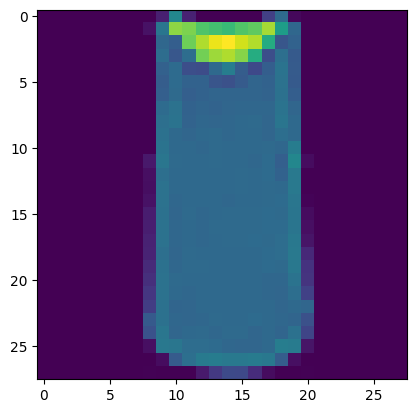

In [ ]:
plt.imshow(trainset.data[2])

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

MLP- многослойная нейронная сеть

In [ ]:
class MLP(nn.Module):
    def __init__(self, size, layer1, layer2, count_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(size, layer1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(layer1, layer2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(layer2, count_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

Создадим нашу модель и настроим гиперпараметры

In [ ]:
size = 28 * 28
layer1 = 128
layer2 = 64
count_classes = 10
learning_rate = 0.001
model = MLP(size, layer1, layer2, count_classes)

Функция потерь и оптимизатор Adam

In [ ]:
crossLoss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Обучим нашу модель, возьмем 10 эпох

In [ ]:
losses = []
accuracies = []

for epoch in range(10):
    work_loss = 0
    predictions = []
    targets = []

    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = crossLoss(outputs, labels)

        loss.backward()
        optimizer.step()

        work_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.numpy())
        targets.extend(labels.numpy())

    accuracy = accuracy_score(targets, predictions)
    accuracies.append(accuracy)

    average_loss = work_loss / len(trainloader)
    losses.append(average_loss)

    print(f'Epoch {epoch + 1}, Average_loss: {average_loss}, Accuracy: {accuracy}')


Epoch 1, Average_loss: 0.4987089659320986, Accuracy: 0.8176833333333333
Epoch 2, Average_loss: 0.39715032475282885, Accuracy: 0.8559333333333333
Epoch 3, Average_loss: 0.36730290107968516, Accuracy: 0.8675333333333334
Epoch 4, Average_loss: 0.3501463240631629, Accuracy: 0.8730333333333333


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f02a9aab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f02a9aab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 5, Average_loss: 0.33889362252871263, Accuracy: 0.8763


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f02a9aab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f02a9aab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 6, Average_loss: 0.3311367652162745, Accuracy: 0.8797666666666667


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f02a9aab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f02a9aab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 7, Average_loss: 0.32325615504502225, Accuracy: 0.8829
Epoch 8, Average_loss: 0.3161292873017524, Accuracy: 0.8861666666666667
Epoch 9, Average_loss: 0.30798945152215207, Accuracy: 0.8873333333333333
Epoch 10, Average_loss: 0.3060920453961358, Accuracy: 0.8893666666666666


Построим графики

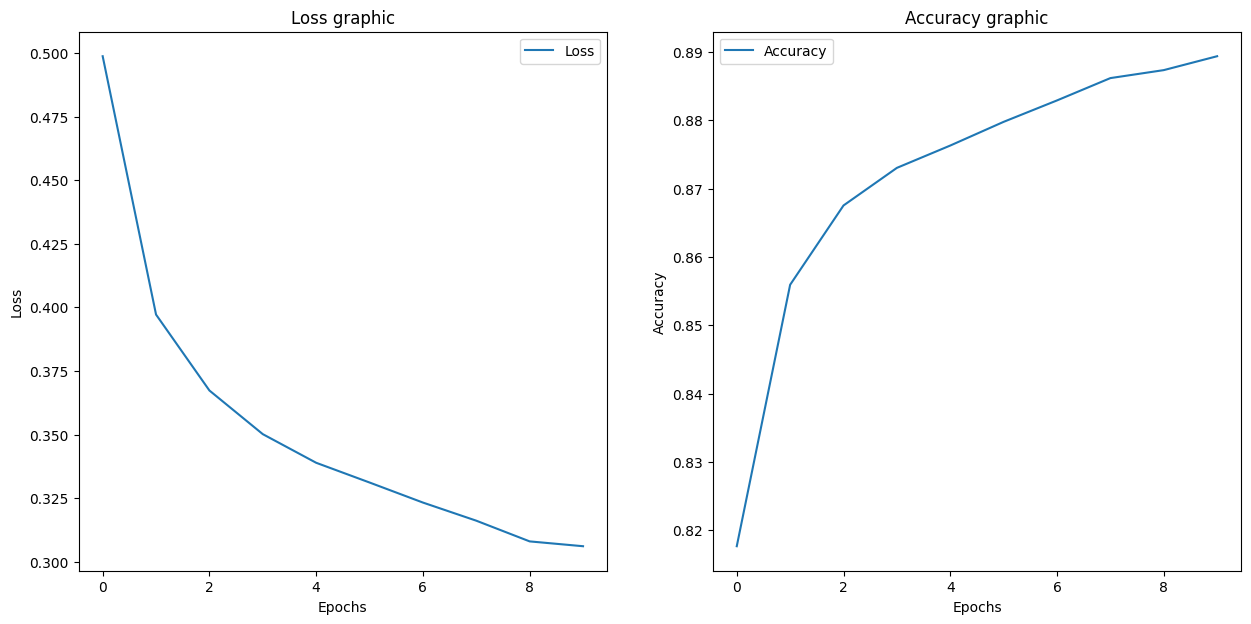

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title('Loss graphic')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.title('Accuracy graphic')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

CNN - Сверточная сеть

In [ ]:
class CNN(nn.Module):
    def __init__(self, count_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, count_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

Создадим нашу модель и настроим гиперпараметры

In [ ]:
count_classes = 10
learning_rate = 0.001

model = CNN(count_classes)

Функция потерь и оптимизатор Adam

In [ ]:
crossLoss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Обучим нашу модель, возьмем 10 эпох

In [ ]:
losses = []
accuracies = []

for epoch in range(10):
    work_loss = 0
    predictions = []
    targets = []

    for images, labels in trainloader:
        optimizer.zero_grad()

        outputs = model(images)

        loss = crossLoss(outputs, labels)

        loss.backward()
        optimizer.step()

        work_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.numpy())
        targets.extend(labels.numpy())

    accuracy = accuracy_score(targets, predictions)
    accuracies.append(accuracy)

    average_loss = work_loss / len(trainloader)
    losses.append(average_loss)

    print(f'Epoch {epoch + 1}, Average_loss: {average_loss}, Accuracy: {accuracy}')

Epoch 1, Average_loss: 0.3647804930146697, Accuracy: 0.8669666666666667
Epoch 2, Average_loss: 0.24452947759689073, Accuracy: 0.91
Epoch 3, Average_loss: 0.20803941356410408, Accuracy: 0.92265
Epoch 4, Average_loss: 0.18181349447678274, Accuracy: 0.9339666666666666
Epoch 5, Average_loss: 0.1656428810272601, Accuracy: 0.9384833333333333
Epoch 6, Average_loss: 0.14321654696220668, Accuracy: 0.9475333333333333
Epoch 7, Average_loss: 0.1358786252094005, Accuracy: 0.9512333333333334
Epoch 8, Average_loss: 0.12080909273653079, Accuracy: 0.9548166666666666
Epoch 9, Average_loss: 0.11037787841516856, Accuracy: 0.9598
Epoch 10, Average_loss: 0.1042037056291836, Accuracy: 0.9628333333333333


Построим графики

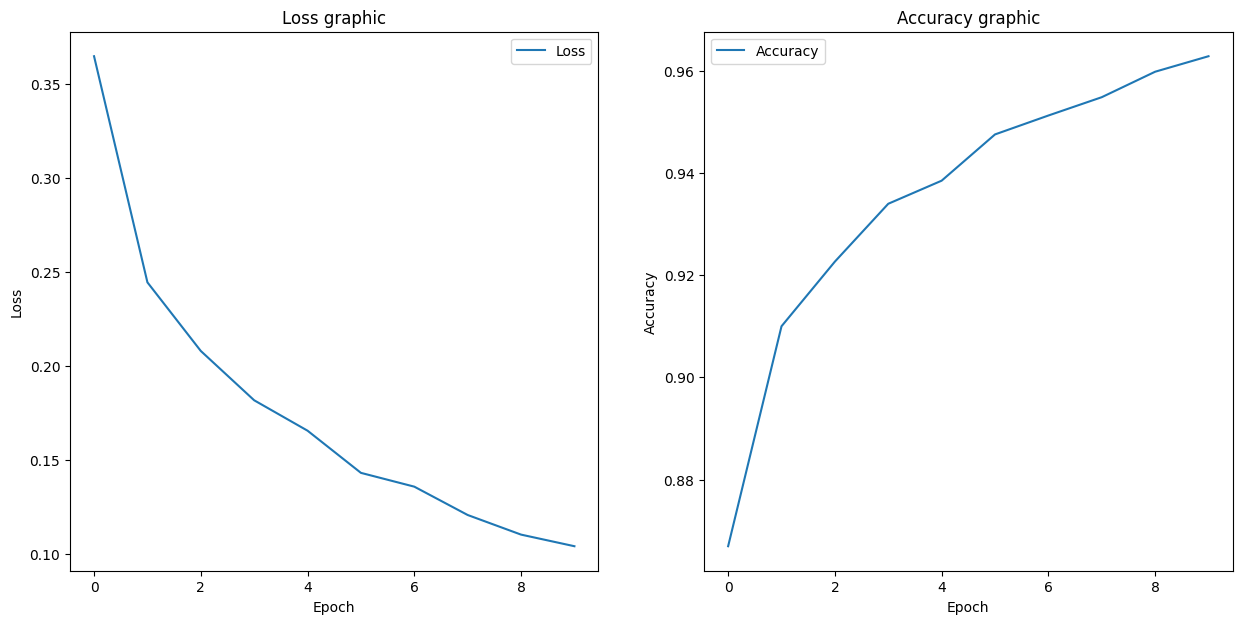

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title('Loss graphic')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.title('Accuracy graphic')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Вывод: можем заметить, что CNN проявляет себя лучше в обработке изображений чем MLP.